# Time Series Analysis Project
## Written By Ali Chen

### Introduction: 
#### The goal of this project is to assess and better understand the driving factors behind Google search interest for a brand. My brand of choice is Hulu. Using the Google Trends API to collect Google Trends data, I will compose a time series analysis for Hulu from October 2014 to October 2018. 

In [1]:
#Import necessary packages
import pandas as pd
import numpy as np

### Part 1: Import Google Trends Data

The Google Trends CSV file was downloaded using the Google Trends API. First, I imported the CSV file and parsed through the dates in the 'period' column.

In [2]:
hulu = pd.read_csv('hulu.googletrends.csv', parse_dates = ['period'])
hulu.head()

,Unnamed: 0,date,value,period,onedifvalue
0,0,Oct 07 2013,8315.286004,2013-10-07,NaN
1,1,Oct 08 2013,4946.639643,2013-10-08,-3368.646360
2,2,Oct 09 2013,4251.535654,2013-10-09,-695.103989
3,3,Oct 10 2013,7202.183136,2013-10-10,2950.647481
4,4,Oct 11 2013,7357.478661,2013-10-11,155.295525


Using the 'seaborn' package, I made a plot of Hulu Period vs. Value

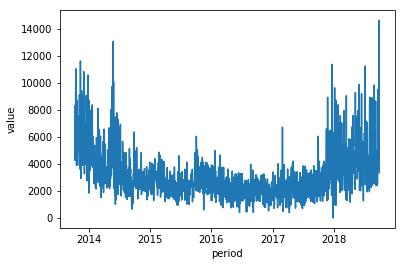

In [5]:
import seaborn as sns
#The lines below import a package that snooze the warnings
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import warnings 

huluplot = sns.lineplot(x = 'period', y = 'value', data=hulu)

Using the 'matplotlib' package, I made a plot of Hulu Period vs. OneDifValue. OneDifValue is a new column I created prior to importing the CSV file. This column is the value of a lag=1 period, or the difference from one day to the next. This column ensures my data has been transformed to a stationary format.

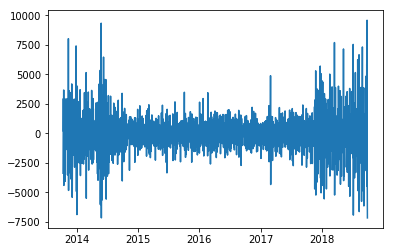

<Figure size 432x288 with 0 Axes>

In [4]:
from matplotlib import pyplot as plt

x = hulu['period']
y = hulu['onedifvalue']

plt.plot(x,y)
plt.show()
plt.clf()

### Part 2: Decompose Google Trends Search Interest Time Series into Components

For part two, I will be using the same Google Trends CSV file as in part one. The time series will be decomposed into 4 parts, indicated by the subplots below.

In [6]:
#Import necessary packages
import matplotlib.dates as mdates
import matplotlib.pyplot as pyplot
import pandas as pd
import numpy as np
from statsmodels.tsa import seasonal

In [7]:
#Specify date/time objects in pandas
hulu['period'] = hulu['period'].dt.date

#Sets dates as index so that it is easier to merge datasets and parse through the data
hulu.set_index('period', inplace = True)

Using the 'DateFormatter', I created new variables for years and months. The 'DateFormatter' will pull out the correct number for each line of data.

In [8]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
yearmonth = mdates.DateFormatter('%m.%y')

The graph below illustrates the dates more clearly with the addition of the years and months variables.

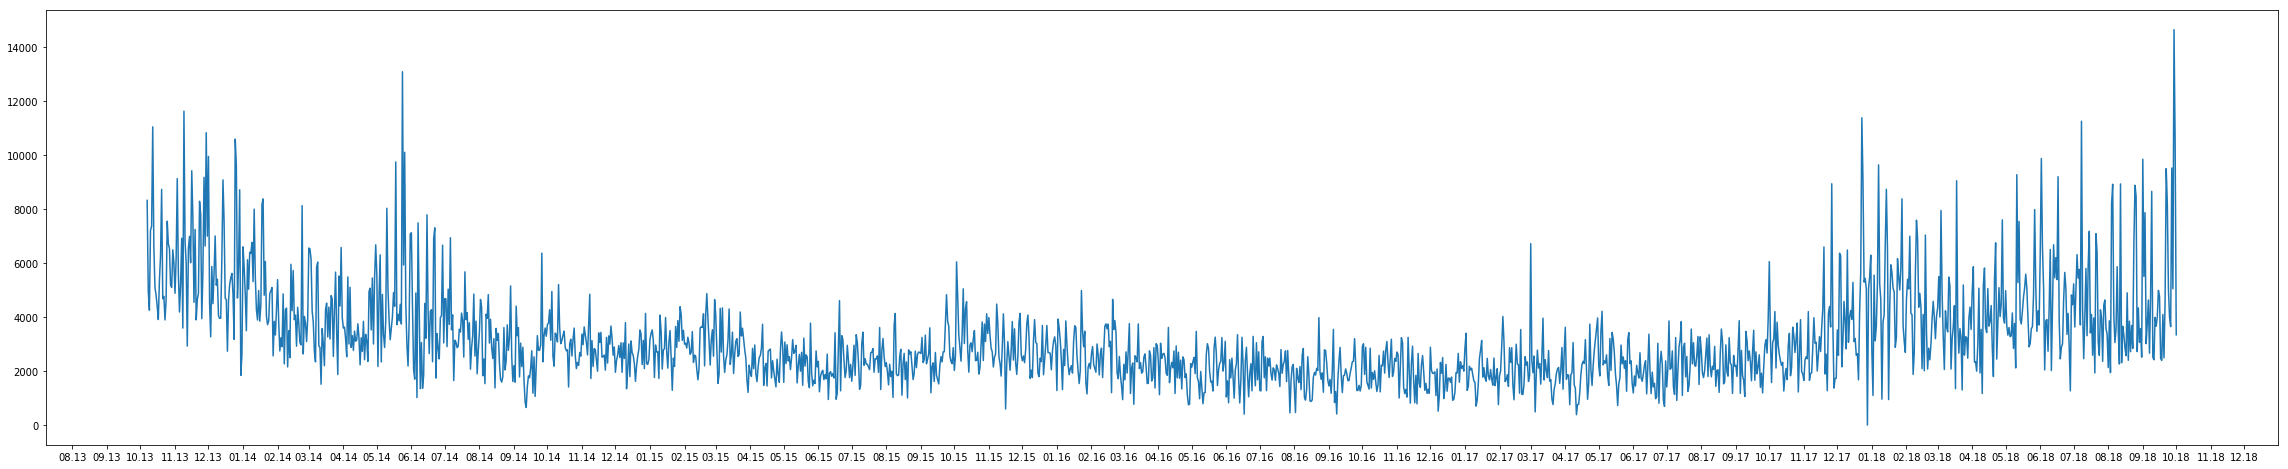

In [9]:
#Set up graph to make the view size larger
dimensions = (40,8)
fig, ax = pyplot.subplots(figsize = dimensions)
#Set parameters
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(yearmonth)
ax.plot(hulu.index, hulu['value'])

In this section, I will be decomposing a model with seasonality. Using the seasonal function from 'statsmodels' package, the decompose model extracts the time series into parts in an unsupervised manner. As a result, this model can tend to overfit the data by picking a seasonal pattern that minimizes the residuals.

In [10]:
#Frequency of model = 365 (number of days in the year)
#Model = additive (time series adds(+) components)
decompose_model = seasonal.seasonal_decompose(hulu['value'].tolist(), freq=365, model='additive')

Inspect the model with the 'directory' function to view decomposed elements of the time series. Each value below is a list that corresponds to seasonality or trend across time, etc.

In [11]:
dir(decompose_model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'nobs',
 'observed',
 'plot',
 'resid',
 'seasonal',
 'trend']

Four subplots for Non-stationary, Trend, Seasonality, and Residuals. By setting 'sharex' equal to all, the four subplots will share the same X axis.

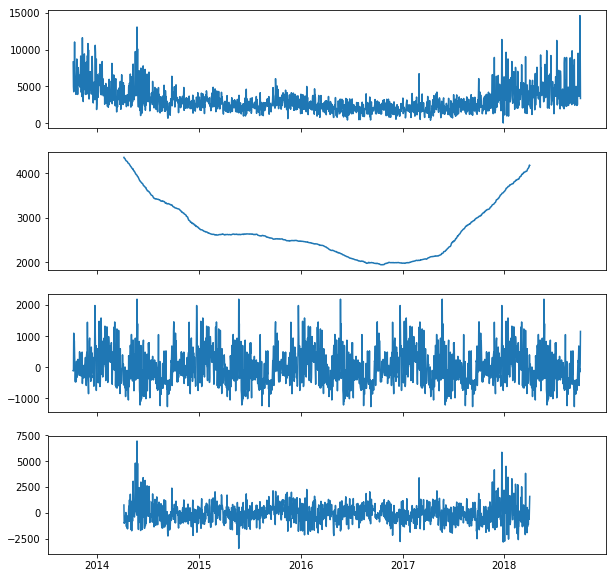

In [12]:
#Set up graph to make the view size larger
dimensions = (10,10)
#Set up four subplots
fig, (ax1, ax2, ax3, ax4) = pyplot.subplots(4, figsize=dimensions, sharex = 'all')

#Set up four subplots: non-stationary, trend, seasonality, and residuals
#Index(X axis) = measure of time for all plots 
ax1.plot(hulu.index, hulu['value'])
ax2.plot(hulu.index, decompose_model.trend)
ax3.plot(hulu.index, decompose_model.seasonal)
ax4.plot(hulu.index, decompose_model.resid)

Plotting seasonality for one calendar year for the Hulu brand.

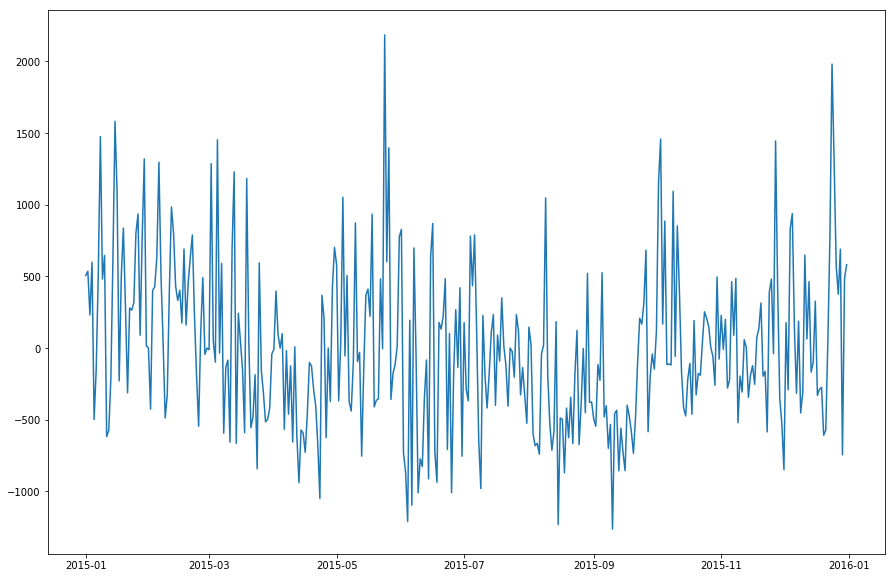

In [13]:
#Create new column named "seasonal" inside the Hulu data frame
hulu['seasonal'] = decompose_model.seasonal
#Extract one year of the data to examine seasonality on a smaller scale of the data
startdate= pd.to_datetime("2015-01-01").date()
enddate = pd.to_datetime("2015-12-31").date()
#Specify the date values of one year
oneyear = hulu.loc[startdate:enddate]
#Set up graph to make the view size larger
dimensions=(15,10)
fig, ax1 = pyplot.subplots(figsize=dimensions)
#Plot seasonality graph for one year of Hulu data
pyplot.plot(oneyear.index, oneyear.seasonal)

##### Translating the contents of this decomposed model in business terms:

The overall trend is a U-shaped curve, as illustrated by the Trend (ax2) subplot. Search interest was high in the beginning near 2014 and follows a steady decline until about 2017, where the search interest starts to steadily grow throughout 2017 to 2018. Hulu's seasonality, illustrated by the Seasonality (ax3) subplot, seems to follow a strict pattern. When comparing the Trend and Seasonality subplots, there are several visual differences among the two. While the Trend subplot demonstrates high=>low=>high (U-shaped curve) search interest over time, the Seasonality subplot shows a distinct pattern of high and low seasons. As a result, seasonality must be driven by consumers because Hulu does not offer any seasonal products. Hulu's streaming service is available to customers 24/7 year round. In this instance, we can assume Hulu follows a "generic consumer sales season" rather than a "product specific sales season." Hulu should expect more search interest during holiday seasons or outlier events such as a new product launch or positive news coverage.

### Part 3: Forecast Trend Data for Next Calendar Year using Facebook Prophet

For part 3, I will be using Facebook Prophet to forecast trend data for the next calendar year for the Hulu brand. I am using the same CSV file as in part one and part two.

In [14]:
#Import necessary packages
from fbprophet import Prophet
import pandas as pd 

Below, I am initiating a new dataframe for Facebook Prophet.

In [15]:
#Specify pandas dataframe format
prophetdataframe = pd.DataFrame()

In [17]:
#Initiate Google Trends data for Hulu
hulu = pd.read_csv('hulu.googletrends.csv', parse_dates = ['period'])
hulu.head()

,Unnamed: 0,date,value,period,onedifvalue
0,0,Oct 07 2013,8315.286004,2013-10-07,NaN
1,1,Oct 08 2013,4946.639643,2013-10-08,-3368.646360
2,2,Oct 09 2013,4251.535654,2013-10-09,-695.103989
3,3,Oct 10 2013,7202.183136,2013-10-10,2950.647481
4,4,Oct 11 2013,7357.478661,2013-10-11,155.295525


In [18]:
#Specify parameters to Facebook Prophet
#ds = datestamp (Hulu data stored in period column)
#y = time series data (Hulu data stored in value column)
prophetdataframe['ds'] = hulu['period']
prophetdataframe['y'] = hulu['value']

In [20]:
#Examine first few rows of Prophet dataframe
prophetdataframe.head()

,ds,y
0,2013-10-07,8315.286004
1,2013-10-08,4946.639643
2,2013-10-09,4251.535654
3,2013-10-10,7202.183136
4,2013-10-11,7357.478661


Initiate Facebook Prophet Model

In [21]:
#Model = Prophet
m = Prophet()

In [22]:
#Use fit functionality to fit data to the model
#In this case, our model does not neet any more parameters other than the data set itself
m.fit(prophetdataframe)

#Disregard warning below (this issue does not effect modeling)

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
#Fit future data to calculate the best estimates for the next 365 days
#Set dataframe period for the next 365 days
future = m.make_future_dataframe(periods=365)

In [24]:
#Inspect last few rows of future dataframe
future.tail()

,ds
2181,2019-09-27
2182,2019-09-28
2183,2019-09-29
2184,2019-09-30
2185,2019-10-01


Now that I have created and fit a model using Facebook Prophet, I will calculate errors and graph a residual plot.

In [25]:
#Create new dataframe for "erroranalysis" to calculate residuals
erroranalysis = m.predict(prophetdataframe)

In [26]:
#Specify observed values from Y variable
erroranalysis['value'] = prophetdataframe['y']
#Create residuals column (actual observed value - predicted value)
erroranalysis['residuals']= erroranalysis['value'] - erroranalysis['yhat']
#Create absolute value of residuals column using abs() function
erroranalysis['absoluteresiduals'] = abs(erroranalysis['residuals'])

In [27]:
#Examine first few rows of "erroranalysis" dataframe
erroranalysis.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,...,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,value,residuals,absoluteresiduals
0,2013-10-07,5647.525893,4466.357714,7420.092763,5647.525893,5647.525893,321.526622,321.526622,321.526622,-182.359828,...,503.886450,503.886450,503.886450,0.0,0.0,0.0,5969.052515,8315.286004,2346.233488,2346.233488
1,2013-10-08,5640.384170,4083.645584,7299.939296,5640.384170,5640.384170,45.583815,45.583815,45.583815,-444.421697,...,490.005512,490.005512,490.005512,0.0,0.0,0.0,5685.967985,4946.639643,-739.328342,739.328342
2,2013-10-09,5633.242448,4144.425403,7344.890906,5633.242448,5633.242448,159.250957,159.250957,159.250957,-310.703751,...,469.954709,469.954709,469.954709,0.0,0.0,0.0,5792.493405,4251.535654,-1540.957751,1540.957751
3,2013-10-10,5626.100725,4151.111815,7206.282548,5626.100725,5626.100725,162.983811,162.983811,162.983811,-281.375699,...,444.359511,444.359511,444.359511,0.0,0.0,0.0,5789.084536,7202.183136,1413.098600,1413.098600
4,2013-10-11,5618.959002,4307.133057,7419.895067,5618.959002,5618.959002,264.217885,264.217885,264.217885,-149.725666,...,413.943551,413.943551,413.943551,0.0,0.0,0.0,5883.176887,7357.478661,1474.301774,1474.301774


In [28]:
#Create new variable "total_error" which is sum of absolute value of residuals
total_error = erroranalysis['absoluteresiduals'].sum()

In [29]:
#Print value of total_error
#Total error of model = 1581196.1869229889 (SSE of time series)
print(total_error)

1581196.1869229889


In [30]:
#Average prediction mean error = 868 units
#Note: on average, by day, my model is off by 868 Google Trend Units
mean_error = print(total_error/len(erroranalysis))
mean_error

868.312019177918


In [31]:
#Summary output of residuals dataframe
erroranalysis['value'].describe()
#Mean = 3118.138441
#Standard deviation = 1707.584901

count     1821.000000
mean      3118.138441
std       1707.584901
min          0.000000
25%       1999.465262
50%       2722.995997
75%       3747.288782
max      14630.786184
Name: value, dtype: float64

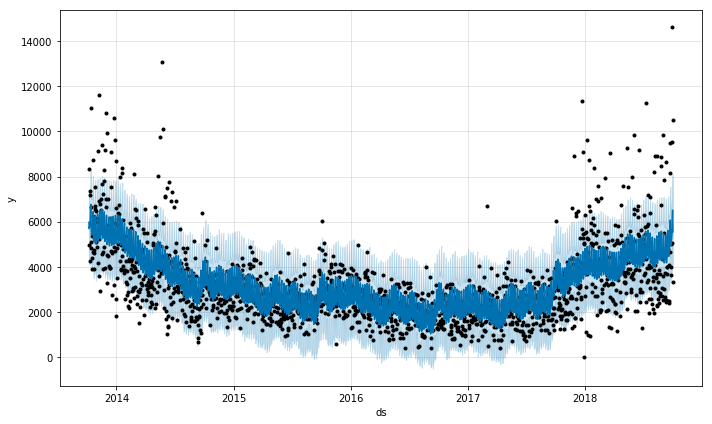

In [32]:
#Plot residuals
fig1 = m.plot(erroranalysis)

##### Addressing Residuals of the Facebook Prophet Model:
The graph above indicates the residuals of the Facebook Prophet model. The total error of model = 1581196.1869229889; this value is also the sum of squared errors (SSE) of the time series model. The mean error of model = 868.312019177918; this value is also the mean squared error (MSE) of the time series model. On average, by day, my model is off by an error of approximately 868 Google Trends Units. As a result, I can conclude that this model does not appear to be very accurate. The residuals, however, seem to be fairly consistent across time, other than the outlier events that are illustrated by the black dots that lie outside of the blue graph. The outlier events are primarily attributed to heightened search interest in the Hulu brand. These outlier events will be investigated later in my analysis.

Initiate Forecast Model to Predict Trend Data for Next Calendar Year

In [33]:
#Model = Predict
forecast = m.predict(future)

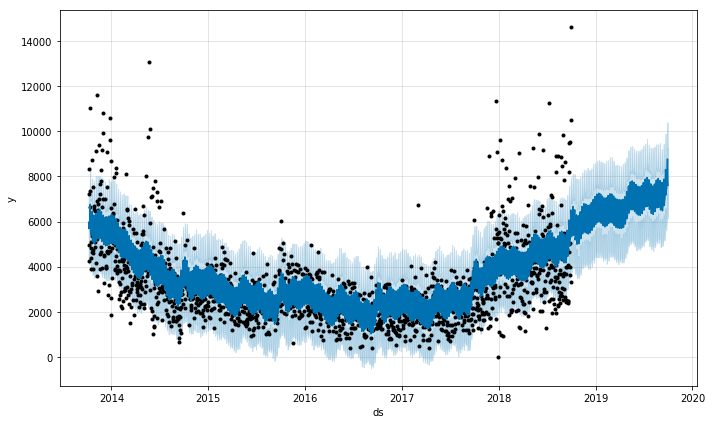

In [34]:
#Plot forecast model
fig2 = m.plot(forecast)
#Light blue = confidence interval at 95% (note: we want to see observed values lie in the light blue)
#Dark blue = error (note: we want to minimize dark blue)

Plotting Forecast Model Components: Trend, Weekly, and Yearly

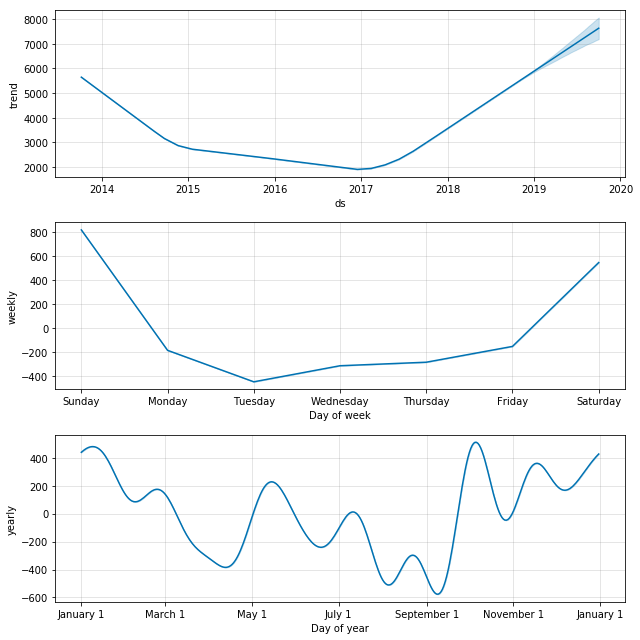

In [35]:
#Plot components of forecast model
#Three subplots: trend, weekly, yearly 
fig2 = m.plot_components(forecast)
#Note: blue shaded line at the end is the forecasting (prediction with our model)

In [36]:
#Examine last few rows of forecast dataframe
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2181,2019-09-27,7605.603074,6114.004206,9171.419196,7173.679396,8035.931993,79.510029,79.510029,79.510029,-149.725666,-149.725666,-149.725666,229.235695,229.235695,229.235695,0.0,0.0,0.0,7685.113104
2182,2019-09-28,7611.976356,6804.634535,10048.567463,7177.751720,8043.593642,833.477973,833.477973,833.477973,548.479133,548.479133,548.479133,284.998840,284.998840,284.998840,0.0,0.0,0.0,8445.454329
2183,2019-09-29,7618.349638,7243.467819,10403.433136,7181.824044,8051.255291,1156.132054,1156.132054,1156.132054,820.107510,820.107510,820.107510,336.024544,336.024544,336.024544,0.0,0.0,0.0,8774.481692
2184,2019-09-30,7624.722920,6223.999142,9303.897106,7185.896369,8058.916941,199.196032,199.196032,199.196032,-182.359828,-182.359828,-182.359828,381.555860,381.555860,381.555860,0.0,0.0,0.0,7823.918952
2185,2019-10-01,7631.096202,6159.083674,9274.772385,7190.315875,8066.578590,-23.477917,-23.477917,-23.477917,-444.421697,-444.421697,-444.421697,420.943780,420.943780,420.943780,0.0,0.0,0.0,7607.618284


##### Interpreting Forecast Graph for Next Calendar Year:

The projected high interest times are forecasted to occur between 2019 and 2020. This is indicated by the light blue shaded portion on the right hand side of the trend graph above. High interest times are also predicted to occur closer to the weekend, between Friday and Saturday as indicated by the weekly graph. The month of October and January are specified as a high interest times, noted by the highest peaks in the yearly graph. The projected low interest times are forecasted to occur on Monday and Tuesday specifically, but are also relatively low for the majority of the weekdays other than Friday. Similarly, low interest times are projected to occur during the month of April, August, and early September, as noted by the lowest valleys of the yearly graph.

### Part 4: Forecast Trend Data with Seasonality and Holidays using Facebook Prophet

In part 4, I will incorporate seasonality and holidays into my forecasting model using Facebook Prophet with the goal of reducing the value of residuals to improve the model. I will use the same CSV file containing Google Trends data for the Hulu brand as in part one, two, and three.

In [37]:
#Holidays package keeps track of past and future holidays
import holidays
from datetime import date

In [38]:
#Find and specify holidays from one year
#For loop iterates through and returns key(date) and holiday name
goodholidays = []
for date, name in sorted(holidays.US(years=2014).items()):
    print(date,name)
    goodholidays.append(name)

2014-01-01 New Year's Day
2014-01-20 Martin Luther King, Jr. Day
2014-02-17 Washington's Birthday
2014-05-26 Memorial Day
2014-07-04 Independence Day
2014-09-01 Labor Day
2014-10-13 Columbus Day
2014-11-11 Veterans Day
2014-11-27 Thanksgiving
2014-12-25 Christmas Day


Removing Irrelevant Holidays from Seasonality

In this section, I will remove holidays that I believe to be irrelevant to the Hulu brand, such as holidays like Columbus Day which are unobserved by some businesses. Thus, I anticipate less search interest on these particular days. I did not remove the holidays where I anticipate an influx of users streaming Hulu such as Christmas, Thanksgiving, etc.

In [39]:
#Specify which holidays to remove
goodholidays.remove("Martin Luther King, Jr. Day")
goodholidays.remove("Columbus Day")
goodholidays.remove("Veterans Day")
goodholidays.remove("Washington's Birthday")
goodholidays.remove("Memorial Day")
goodholidays.remove("Labor Day")

In [40]:
#Create new dataframe for holidays to use in Facebook Prophet
#holiday = name of holiday
#ds = datestamp of holiday
#lower_window = set parameters of holiday window (specifies when holiday begins)
#upper_window = set parameters of holiday window (specifies when holiday ends)
sales = pd.DataFrame(columns=['holiday', 'ds', 'lower_window', 'upper_window'])

In [41]:
#Examine new blank dataframe
sales.head()

,holiday,ds,lower_window,upper_window


Adding Holidays to Dataframe

In [42]:
#For loop to create an entry for each holiday in the dataframe
#Note: Can add more holidays to this for loop (must be a holiday that we can be predicted ahead of time)
for year in range(2014,2021): 
    for date, name in sorted(holidays.US(years=year).items()):
        lower_window= 0
        upper_window= 0
        if name in goodholidays:
            dayoftheweek = date.weekday()
            #print(dayoftheweek)
            #print(date,name)
            if dayoftheweek == 0:
                lower_window = -2 #specifying when to start the holiday weekend (2 days before)
            if dayoftheweek ==1:
                lower_window= -3
            if dayoftheweek == 3:
                upper_window = 3
            if dayoftheweek == 4:
                upper_window = 2
            sales.loc[len(sales)] = [name, date, lower_window, upper_window] #use location function to create an index... 

In [43]:
#Examine first few rows of dataframe with holiday entries
sales.head()

,holiday,ds,lower_window,upper_window
0,New Year's Day,2014-01-01,0,0
1,Independence Day,2014-07-04,0,2
2,Thanksgiving,2014-11-27,0,3
3,Christmas Day,2014-12-25,0,3
4,New Year's Day,2015-01-01,0,3


In [44]:
#Examine first few rows of Hulu data
hulu.head()

,Unnamed: 0,date,value,period,onedifvalue
0,0,Oct 07 2013,8315.286004,2013-10-07,NaN
1,1,Oct 08 2013,4946.639643,2013-10-08,-3368.646360
2,2,Oct 09 2013,4251.535654,2013-10-09,-695.103989
3,3,Oct 10 2013,7202.183136,2013-10-10,2950.647481
4,4,Oct 11 2013,7357.478661,2013-10-11,155.295525


In [45]:
#Initiate Prophet dataframe
prophetdataframe = pd.DataFrame()

In [46]:
#Specify parameters to Prophet
#ds = datestamp
#y = value
prophetdataframe['ds'] = hulu['period']
prophetdataframe['y'] = hulu['value']

In [47]:
#Examine first few rows of Prophet dataframe
prophetdataframe.head()

,ds,y
0,2013-10-07,8315.286004
1,2013-10-08,4946.639643
2,2013-10-09,4251.535654
3,2013-10-10,7202.183136
4,2013-10-11,7357.478661


Initiate Facebook Prophet Model with Holidays

In [48]:
#Model = Prophet
m = Prophet(holidays=sales)

In [49]:
#Including more holidays from specified country (US)
m.add_country_holidays(country_name='US')

In [50]:
#Fit Prophet dataframe to Prophet model with fit() functionality
m.fit(prophetdataframe)

#Ignore warning message below (does not effect outcome of model)

/usr/local/lib/python3.6/dist-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [51]:
#Print name of holidays
print(m.train_holiday_names)

0                  New Year's Day
1                Independence Day
2                    Thanksgiving
3                   Christmas Day
4     Martin Luther King, Jr. Day
5           Washington's Birthday
6                    Memorial Day
7                       Labor Day
8                    Columbus Day
9                    Veterans Day
10       Christmas Day (Observed)
11      New Year's Day (Observed)
12        Veterans Day (Observed)
13    Independence Day (Observed)
dtype: object


In [52]:
#Create predictions for next calendar year
#Periods = 365 days (in one year)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

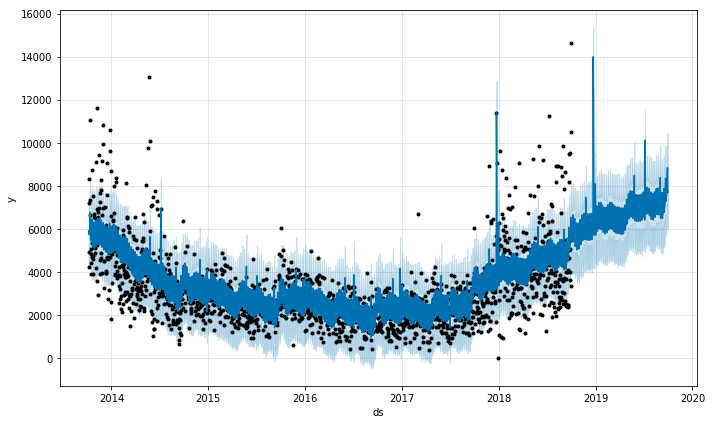

In [53]:
#Plot forecast predictions for next calendar year
#Shaded blue on right hand side of the graph is the forecast
fig4 = m.plot(forecast)

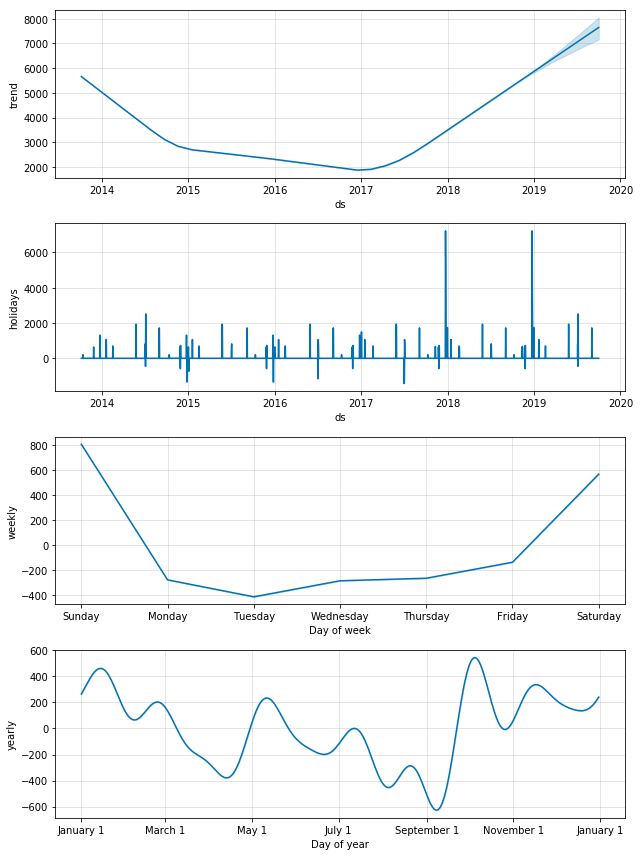

In [54]:
#Plot components of forecast model
fig5 = m.plot_components(forecast)

In [55]:
#Download forecast data to CSV
forecast.to_csv('forecast.csv')

Initiate Facebook Prophet Model with Seasonality, Holidays, and Residuals

In [56]:
#Model = Predict
erroranalysis = m.predict(prophetdataframe)

In [58]:
#Add up residuals/errors observed each day

#Specify observed values from Y variable
erroranalysis['value'] = prophetdataframe['y']
#Create residuals column (actual observed value - predicted value)
erroranalysis['residuals']= erroranalysis['value'] - erroranalysis['yhat']
#Create absolute value of residuals column using abs() function
erroranalysis['absoluteresiduals'] = abs(erroranalysis['residuals'])

In [59]:
#Examine first few rows of "erroranalysis" dataframe
erroranalysis.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,value,residuals,absoluteresiduals
0,2013-10-07,5662.141715,4440.149372,7421.312650,5662.141715,5662.141715,0.0,0.0,0.0,0.0,...,527.105552,527.105552,527.105552,0.0,0.0,0.0,5911.212311,8315.286004,2404.073693,2404.073693
1,2013-10-08,5654.769591,4151.993681,7270.641197,5654.769591,5654.769591,0.0,0.0,0.0,0.0,...,508.693272,508.693272,508.693272,0.0,0.0,0.0,5749.364662,4946.639643,-802.725019,802.725019
2,2013-10-09,5647.397467,4427.017165,7404.566328,5647.397467,5647.397467,0.0,0.0,0.0,0.0,...,484.511966,484.511966,484.511966,0.0,0.0,0.0,5846.503408,4251.535654,-1594.967754,1594.967754
3,2013-10-10,5640.025344,4324.592951,7309.316082,5640.025344,5640.025344,0.0,0.0,0.0,0.0,...,455.309420,455.309420,455.309420,0.0,0.0,0.0,5830.167411,7202.183136,1372.015724,1372.015724
4,2013-10-11,5632.653220,4540.287318,7433.556999,5632.653220,5632.653220,0.0,0.0,0.0,0.0,...,421.913421,421.913421,421.913421,0.0,0.0,0.0,5917.815789,7357.478661,1439.662872,1439.662872


In [60]:
#Create new variable "total_error" which is sum of absolute value of residuals
total_error = erroranalysis['absoluteresiduals'].sum()
total_error
#total_error = 1538823.7470775251

1538823.7470775251

In [61]:
#Average prediction mean error = 845 units
#Note: on average, by day, I am off by 845 Google Trend Units
mean_error = print(total_error/len(erroranalysis))
mean_error
#mean_error = 845.0432438646486

845.0432438646486


In [91]:
#Examine top 10 days with largest residuals
#Index(row number): Number on far left of data output
#absoluteresiduals: column calculates how many units off the prediction is
print(erroranalysis.nlargest(10, 'absoluteresiduals'))

             ds        trend   yhat_lower   yhat_upper  trend_lower  \
229  2014-05-24  3975.613206  3013.532068  6082.016150  3975.613206   
1818 2018-09-29  5261.273252  4700.397119  7731.278005  5261.273252   
1735 2018-07-08  4721.750462  4076.468209  7022.756586  4721.750462   
53   2013-11-29  5271.419164  3933.038274  6881.546135  5271.419164   
33   2013-11-09  5418.861636  4793.337621  7811.672565  5418.861636   
1553 2018-01-07  3538.700487  3270.898714  6263.819694  3538.700487   
1699 2018-06-02  4487.740577  3550.312429  6483.231548  4487.740577   
1241 2017-03-01  1950.619411   386.455522  3342.614860  1950.619411   
1677 2018-05-11  4344.734536  3004.546706  5941.912240  4344.734536   
223  2014-05-18  4019.659083  3485.185453  6422.886008  4019.659083   

      trend_upper  Christmas Day  Christmas Day_lower  Christmas Day_upper  \
229   3975.613206            0.0                  0.0                  0.0   
1818  5261.273252            0.0                  0.0         

Removing Outliers from Data

In order to remove outliers to improve model accuracy, I used a Google Search with a custom date range that corresponds to the start and end dates of my datas set. I searched for "Hulu" in the News tab on the Google Search engine and created a list of the dates in which Hulu had the most media coverage, whether it was positive or negative. Removing these outlier events should decrease the total error and mean error from my original forecast Prophet model values in part three.

In [63]:
#Remove outliers from data to improve model prediction
#Dates removed are important dates to the Hulu brand (new product launch, positive news coverage, etc.)

#(2013-10-23): Hulu announces first free mobile videos
date = pd.to_datetime("2013-10-23")

#Set index parameters
theindex = prophetdataframe[prophetdataframe.ds == date].index

In [64]:
#Print index
print(theindex)

Int64Index([16], dtype='int64')


In [65]:
#Write over original data frame with same data frame but get rid of the index
prophetdataframe = prophetdataframe.drop(theindex)

In [92]:
#Repeat above process to remove the remaining outliers
#(2013-11-09): Hulu’s TV show ‘The Wrong Mans’ creates buzz online with reviews, articles, etc.
date = pd.to_datetime("2013-11-09")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex) 

Int64Index([], dtype='int64')


In [93]:
#(2013-11-29): Hulu mentioned in The New York Times
date = pd.to_datetime("2013-11-29")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([], dtype='int64')


In [94]:
#(2014-05-18): Hulu streams Andy Samberg starring in his final episode of SNL
date = pd.to_datetime("2014-05-18")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([], dtype='int64')


In [95]:
#(2014-05-24): Hulu mentioned in USA Today about new upcoming shows available for streaming
date = pd.to_datetime("2014-05-24")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([], dtype='int64')


In [96]:
#(2014-05-26): Hulu begins streaming TV shows Brooklyn Nine-Nine and The Brady Bunch
date = pd.to_datetime("2014-05-26")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([], dtype='int64')


In [97]:
#(2015-09-02): Hulu introduces commercial-free streaming plan for additional $4/per month
date = pd.to_datetime("2015-09-02")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([], dtype='int64')


In [98]:
#(2015-05-04): Hulu announces live streaming TV for next year
date = pd.to_datetime("2015-05-04")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([], dtype='int64')


In [99]:
#(2016-08-08): Hulu ends free streaming service
date = pd.to_datetime("2015-08-08")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([], dtype='int64')


In [100]:
#(2017-03-01): Hulu begins providing 24/7 customer service ahead of live TV launch
date = pd.to_datetime("2017-03-01")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([], dtype='int64')


In [101]:
#(2017-04-26): Hulu's new TV show "Handmaid's Tale" creates headlines and news coverage
date = pd.to_datetime("2017-04-26")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([], dtype='int64')


In [102]:
#(2017-05-03): Hulu launches live TV streaming
date = pd.to_datetime("2017-05-03")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([], dtype='int64')


In [103]:
#(2017-07-25): Hulu is added to Nielsen's TV ratings
date = pd.to_datetime("2017-07-25")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([], dtype='int64')


In [104]:
#(2017-09-07): Hulu partners with Spotify to offer bundle deal prices
date = pd.to_datetime("2017-09-07")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([], dtype='int64')


In [105]:
#(2018-01-07): Hulu receives Golden Globe for Best TV Drama "Handmaid's Tale"
date = pd.to_datetime("2018-01-07")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([], dtype='int64')


In [106]:
#(2018-01-14): Hulu announces premier date of TV Show "Handmaid's Tale" Season 2
date = pd.to_datetime("2018-01-14")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([1560], dtype='int64')


In [107]:
#(2018-01-28): Hulu offers live TV streaming of 2018 Grammys Award Show
date = pd.to_datetime("2018-01-28")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([1574], dtype='int64')


In [108]:
#(2018-03-18): Producers of Hulu's TV Show "Handmaid's Tale" releases preview clips for Season 2 at PaleyFest 
date = pd.to_datetime("2018-03-18")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([], dtype='int64')


In [109]:
#(2018-04-11): Hulu and Spotify launch discounted bundle for $12.99
date = pd.to_datetime("2018-04-11")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([], dtype='int64')


In [110]:
#(2018-05-11): Hulu has technical issue that gives error code message to users
date = pd.to_datetime("2018-05-11")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([], dtype='int64')


In [111]:
#(2018-06-02): Hulu's Chief Content Officer announces departure from company
date = pd.to_datetime("2018-06-02")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([], dtype='int64')


In [112]:
#(2018-06-17): Hulu announced pilot in works for "Handsmaid's Tale" spin-off TV show
date = pd.to_datetime("2018-06-17")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([], dtype='int64')


In [113]:
#(2018-07-08): Hulu makes headlines for TV show premier "Handmaid's Tale" season 2
date = pd.to_datetime("2018-07-08")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([], dtype='int64')


In [114]:
#(2018-08-05): Hulu offers live TV streaming of 2018 iHeartCountry Festival
date = pd.to_datetime("2018-08-05")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([1763], dtype='int64')


In [115]:
#(2018-08-12): Hulu Becomes First Streaming Service To Carry Jeopardy
date = pd.to_datetime("2018-08-12")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([1770], dtype='int64')


In [121]:
#(2018-08-25): Hulu releases two docuseries 'Safe Harbour' and 'Crime + Punishment' that create buzz online
date = pd.to_datetime("2018-08-25")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([1783], dtype='int64')


In [116]:
#(2018-09-01): College football season kickoff available on Hulu live TV streaming
date = pd.to_datetime("2018-09-01")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([], dtype='int64')


In [117]:
#(2018-09-22): Hulu announces reboot of TV show "Veronica Mars"
date = pd.to_datetime("2018-09-22")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([1811], dtype='int64')


In [118]:
#(2018-09-27): Hulu ranked "dominant streaming service for TV shows" in study published via ReelGood
date = pd.to_datetime("2018-09-27")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([], dtype='int64')


In [119]:
#(2018-09-30): Hulu reports widespread outages for live TV streaming 
date = pd.to_datetime("2018-09-30")
theindex = prophetdataframe[prophetdataframe.ds == date].index
print(theindex)
prophetdataframe = prophetdataframe.drop(theindex)

Int64Index([], dtype='int64')


In [199]:
#Summary output of dataframe
#Overall, 30 outlier entries have been removed from the data, which is 0.01% of the data.
prophetdataframe.describe()

,y,value
count,1791.000000,1791.000000
mean,3040.308137,3040.308137
std,1558.584919,1558.584919
min,0.000000,0.000000
25%,1991.577004,1991.577004
50%,2707.482756,2707.482756
75%,3709.605251,3709.605251
max,14630.786184,14630.786184


In [204]:
#Calculate new variable "total_error_removed_outliers" which is total error of Prophet model with removed holidays/outliers
total_error_removed_outliers = erroranalysis['absoluteresiduals'].sum()
total_error_removed_outliers
#total_error= 1432217.7975340863

1432217.7975340863

In [205]:
#Calculate new variable "mean_error_removed_outliers" which is mean error of Prophet model with removed holidays/outliers
#Average prediction mean error = 768 units
#Note: on average, by day, I am off by 768 Google Trend Units
mean_error_removed_outliers = print(total_error_removed_outliers/len(erroranalysis))
mean_error_removed_outliers
#mean_error = 786.5007125393115

786.5007125393115


##### Effects on Prophet Model with Holidays and Outlier Events

Ultimately, removing irrelevant holidays and outlier for the Hulu brand decreased the mean and standard deviation of my forecast Prophet model. Prior to addressing holidays and outliers, the model's total error was approximately 1581196 with a mean error of approximately 868 Google Trend Units. After excluding the irrelevant holidays, the model's total error and mean error both decreased in value, indicating improvement in overall model accuracy. The improved model has a total error of approximately 1538823 and a mean error of about 845 786. When removing outlier events, the total error and mean squared error reduced further in value. After removing outlier events, the total error is about 1432217 and the mean squared error is about 786 Google Trend Units. In conclusion, removing holidays helped to reduce the error of the model but ultimately removing outlier events contributed to a majority of the reduction in error value. Removing outlier events decreased the prediction mean error from 868 units to 786 units, which is a total reduction by 82 Google Trend Units---thus, resulting in a more accurate model.

##### Outliers in a Marketing Context

Outliers occured in the Hulu Google Trends data set for a variety of reasons. After investigating over 30 outlier events, I concluded several ways in which Hulu receives both positive and negative media news coverage. First off, some of the repeating outlier events that occur on a yearly basis are Christmas and Thanksgiving. During these holidays and the days following, there is a significant increase in search interest for Hulu. This was anticipated because we expect search interest to increase during observed holidays, where families and individuals are more likely to be streaming Hulu. Similarly, college football kick-off around September and releasing new TV shows periodically also contributes to outlier events in the data. Furthermore, the most insightful knowledge I gained from researching outlier events for Hulu is that the general public is obsessed with Hulu's TV Show "Handmaid's Tale" which was released in 2017. Nearly 1/4 of the outlier events were relating to a Season 2 trailer, release date, Golden Globe Award, or spin-off show made by the producers of "Handmaid's Tale." This TV show has created a lot of buzz for Hulu and is the most probable cause for the surge in high search interest from 2018-2019, following the lowest search interest point at the start of 2017. In terms of marketing, Hulu should continue to prioritize its original TV shows and increase news coverage about the upcoming season of "Handmaid's Tale." Other outlier events occurred when Hulu announced a new product launch such as a bundle deal with Spotify on 04-11-2018 and live TV streaming on 05-03-2017. Often, Hulu is compared to its competitor streaming service, Netflix. If Hulu can continue to launch new products and differentiate themselves as a brand from Netflix, then this will help to increase overall search interest. Lastly, Hulu receieved negative news coverage during several of the outlier events. During these negative events, Hulu encountered technical difficulties which prevented users from accessing the streaming service for certain periods of time such as on 5-11-2018 and 09-30-2018. It would be helpful for Hulu to implement some sort of infrastructure to ensure widespread outages and technical difficulties won't negatively effect users for extended periods of time.

### Part 5: Clean up and Prepare AdSpend data for Granger Causal & Predictive Analysis

Using data provided by AdSpend, I will clean and transform the data set in order to prepare for Granger Causal and predictive analysis. I will also be using the Google Trends data for Hulu as in part one, two, three, and four.

In [269]:
#Import ad spend data for Hulu
adspend = pd.read_csv('hulu.adspend.csv')

Below, I remove products associated with specific Hulu TV shows from the AdSpend dataset. I removed these products because they are specific to Hulu Online TV shows rather than Hulu product types. The remaining products that will be included in the AdSpend data are as follows----Hulu : Online, Hulu Plus : Online, Hulu With Live TV : Online,  Hulu Online & Hulu Plus Online : Combo,  Hulu Latino : Online, Hulu Advertising Service : Advertising Services, Hulu : Mobile App, Hulu : Corporate Promotion.

In [270]:
#Remove products irrelevant products from ad spend
adspend = adspend[adspend.PRODUCT != 'Hulu-Wrong Mans : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Deadbeat : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Awesomes : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-East Los High : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Jack Hannas Wild Countdown : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Soy Tu Duena : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Triunfo Del Amor : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Empire : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Tyrant : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Seinfeld : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Difficult People : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Strain : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Hotwives Of Las Vegas : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Youre The Worst : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Casual : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Manhattan : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Mindy Project : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Awesomes : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-11.22.63 : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Path : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Curious George : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Ocean Mysteries : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-He Named Me Malala : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-SpongeBob Movie Sponge Out Of Water : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Teenage Mutant Ninja Turtles : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Beatles Live At The Hollywood Bowl : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Beatles Eight Days A Week : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Eight Days A Week : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Chance : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Shut Eye : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Handmaids Tale : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Harlots : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Good Behavior : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Future Man : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-I Love You America : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Small Business Revolution : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Marvel Runaways : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Castle Rock : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Hard Sun : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Looming Tower : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Real Announcers Of Studio J : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Superstore : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Minding The Gap : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-American Crime : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Crime & Punishment : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-College Football : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-First : Online']
adspend = adspend[adspend.PRODUCT != 'Hulu-Main Street : Online']

In [271]:
#Use value_counts function to view frequency counts of Product
adspend['PRODUCT'].value_counts()

Hulu : Online                                      240
Hulu Plus : Online                                  89
Hulu With Live TV : Online                          20
Hulu Online & Hulu Plus Online : Combo              12
Hulu Advertising Service : Advertising Services     10
Hulu Latino : Online                                10
Hulu : Mobile App                                    7
Hulu : Corporate Promotion                           7
Name: PRODUCT, dtype: int64

Clean up and Remove Text Strings from AdSpend Data

In [272]:
#Clean up time period column by removing string of text "week of"
#Replace "week of" with nothing (essentially deleting the string)
adspend['TIME PERIOD'] = adspend['TIME PERIOD'].str.replace("WEEK OF ", "", regex=True)
#Observe changes made below
adspend.head()

,TIME PERIOD,PRODUCT,TOTAL DOLS (000),NETWORK TV DOLS (000),CABLE TV DOLS (000),SYNDICATION DOLS (000),SPOT TV DOLS (000),MAGAZINES DOLS (000),SUNDAY MAGS DOLS (000),NATL NEWSP DOLS (000),NEWSPAPER DOLS (000),NETWORK RADIO DOLS (000),NAT SPOT RADIO DOLS (000),OUTDOOR DOLS (000)
0,"OCT 07, 2013 (B)",Hulu : Online,47.8,0.0,0.0,0.0,47.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"OCT 07, 2013 (B)",Hulu Online & Hulu Plus Online : Combo,4.2,0.0,0.0,0.0,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"OCT 07, 2013 (B)",Hulu Plus : Online,763.2,0.0,363.8,379.9,19.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"OCT 14, 2013 (B)",Hulu : Online,40.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"OCT 14, 2013 (B)",Hulu Online & Hulu Plus Online : Combo,3.6,0.0,0.0,0.0,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [273]:
#Clean up time period column by removing string of text "(B)"
#Replace "(B)" with nothing (essentially deleting the string)
adspend['TIME PERIOD'] = adspend['TIME PERIOD'].str.replace(" \(B\)", "", regex=True)
#Observe changes made below
adspend.head()

,TIME PERIOD,PRODUCT,TOTAL DOLS (000),NETWORK TV DOLS (000),CABLE TV DOLS (000),SYNDICATION DOLS (000),SPOT TV DOLS (000),MAGAZINES DOLS (000),SUNDAY MAGS DOLS (000),NATL NEWSP DOLS (000),NEWSPAPER DOLS (000),NETWORK RADIO DOLS (000),NAT SPOT RADIO DOLS (000),OUTDOOR DOLS (000)
0,"OCT 07, 2013",Hulu : Online,47.8,0.0,0.0,0.0,47.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"OCT 07, 2013",Hulu Online & Hulu Plus Online : Combo,4.2,0.0,0.0,0.0,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"OCT 07, 2013",Hulu Plus : Online,763.2,0.0,363.8,379.9,19.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"OCT 14, 2013",Hulu : Online,40.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"OCT 14, 2013",Hulu Online & Hulu Plus Online : Combo,3.6,0.0,0.0,0.0,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [274]:
#Clean up column names by removing string of text "DOLS 000"
#Replace "DOLS 000" with nothing (essentially deleting the string)
adspend.columns = adspend.columns.str.replace(" DOLS \(000\)", "", regex=True)

In [275]:
#View list of columns in adspend data
list(adspend)

['TIME PERIOD',
 'PRODUCT',
 'TOTAL',
 'NETWORK TV',
 'CABLE TV',
 'SYNDICATION',
 'SPOT TV',
 'MAGAZINES',
 'SUNDAY MAGS',
 'NATL NEWSP',
 'NEWSPAPER',
 'NETWORK RADIO',
 'NAT SPOT RADIO',
 'OUTDOOR']

In [276]:
#Create new time variable for "fixed time"
#Pandas will read our cleaned up "time period" column as a date
adspend['FIXED TIME']= pd.to_datetime(adspend['TIME PERIOD'])

adspend.head()

,TIME PERIOD,PRODUCT,TOTAL,NETWORK TV,CABLE TV,SYNDICATION,SPOT TV,MAGAZINES,SUNDAY MAGS,NATL NEWSP,NEWSPAPER,NETWORK RADIO,NAT SPOT RADIO,OUTDOOR,FIXED TIME
0,"OCT 07, 2013",Hulu : Online,47.8,0.0,0.0,0.0,47.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-10-07
1,"OCT 07, 2013",Hulu Online & Hulu Plus Online : Combo,4.2,0.0,0.0,0.0,4.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-10-07
2,"OCT 07, 2013",Hulu Plus : Online,763.2,0.0,363.8,379.9,19.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-10-07
3,"OCT 14, 2013",Hulu : Online,40.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-10-14
4,"OCT 14, 2013",Hulu Online & Hulu Plus Online : Combo,3.6,0.0,0.0,0.0,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-10-14


In [277]:
#Create new dataframe for adspend with no products
#Pivot table to sum together weekly ad spend across several products for one week
adspendnoproducts = adspend.pivot_table(index='FIXED TIME', aggfunc=np.sum)

In [278]:
#View list of columns in dataframe for adspend with no products 
list(adspendnoproducts)

['CABLE TV',
 'MAGAZINES',
 'NAT SPOT RADIO',
 'NATL NEWSP',
 'NETWORK RADIO',
 'NETWORK TV',
 'NEWSPAPER',
 'OUTDOOR',
 'SPOT TV',
 'SUNDAY MAGS',
 'SYNDICATION',
 'TOTAL']

In [279]:
#View index for dataframe adspend with no products
#There are 260 rows of data in this dataframe
#1 cummulative entry per week
adspendnoproducts.index

DatetimeIndex(['2013-10-07', '2013-10-14', '2013-10-21', '2013-10-28',
               '2013-11-04', '2013-11-11', '2013-11-18', '2013-11-25',
               '2013-12-02', '2013-12-09',
               ...
               '2018-07-30', '2018-08-06', '2018-08-13', '2018-08-20',
               '2018-08-27', '2018-09-03', '2018-09-10', '2018-09-17',
               '2018-09-24', '2018-10-01'],
              dtype='datetime64[ns]', name='FIXED TIME', length=260, freq=None)

Plotting AdSpend: Cable TV, Newspaper, Spot TV, and Total

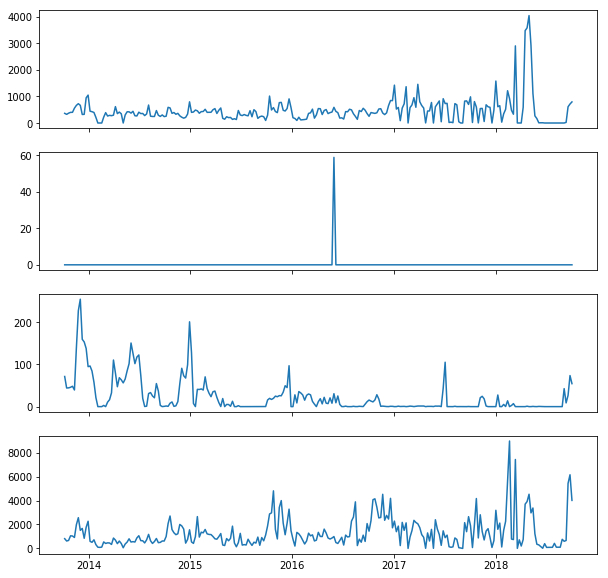

In [334]:
#Set up graph for larger view
dimensions = (10,10)
fig, (ax1, ax2, ax3, ax4) = pyplot.subplots(4, figsize=dimensions, sharex='all')
#Plot 4 subplots for adspend with no products: Cable TV, Newspaper, Spot TV, Total
ax1.plot(adspendnoproducts.index, adspendnoproducts['CABLE TV'])
ax2.plot(adspendnoproducts.index, adspendnoproducts['NEWSPAPER'])
ax3.plot(adspendnoproducts.index, adspendnoproducts['SPOT TV'])
ax4.plot(adspendnoproducts.index, adspendnoproducts['TOTAL'])

In [281]:
#Run test date to see what day of the week the date entry is
#weekday = 0 (Monday)
testdate = pd.to_datetime("2013-10-07")
testdate.weekday()

0

In [282]:
#Import Google Trends data for Hulu and parse dates
hulu = pd.read_csv('hulu.googletrends.csv', parse_dates = ['period'])

#Set index for Hulu data with period
#Index is shaded in bold in head() view
hulu.set_index('period', inplace=True)

hulu.head()

,Unnamed: 0,date,value,onedifvalue
period,,,,
2013-10-07,0,Oct 07 2013,8315.286004,NaN
2013-10-08,1,Oct 08 2013,4946.639643,-3368.646360
2013-10-09,2,Oct 09 2013,4251.535654,-695.103989
2013-10-10,3,Oct 10 2013,7202.183136,2950.647481
2013-10-11,4,Oct 11 2013,7357.478661,155.295525


In [283]:
#Use resample function to resample the data
#Ensures "week of" data will begin at the start of the week (Monday)

#W = week 
#MON = Monday (week will start on Monday)
huluweekly = hulu.resample('W-MON', closed='left', label='left').mean()
hulu.head()

,Unnamed: 0,date,value,onedifvalue
period,,,,
2013-10-07,0,Oct 07 2013,8315.286004,NaN
2013-10-08,1,Oct 08 2013,4946.639643,-3368.646360
2013-10-09,2,Oct 09 2013,4251.535654,-695.103989
2013-10-10,3,Oct 10 2013,7202.183136,2950.647481
2013-10-11,4,Oct 11 2013,7357.478661,155.295525


In [284]:
#Merge weekly data with dataframe adspend with no products
mergedweeklydata = adspendnoproducts.join(huluweekly)

mergedweeklydata.head()

,CABLE TV,MAGAZINES,NAT SPOT RADIO,NATL NEWSP,NETWORK RADIO,NETWORK TV,NEWSPAPER,OUTDOOR,SPOT TV,SUNDAY MAGS,SYNDICATION,TOTAL,Unnamed: 0,value,onedifvalue
FIXED TIME,,,,,,,,,,,,,,,
2013-10-07,363.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.5,0.0,379.9,815.2,3,7106.318305,-279.902227
2013-10-14,325.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.2,0.0,250.5,619.8,10,5504.757506,297.620141
2013-10-21,369.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.5,0.0,253.9,668.3,17,5532.372752,-311.716903
2013-10-28,400.6,0.0,0.0,0.0,1.7,0.0,0.0,462.5,45.9,0.0,143.3,1054.0,24,6133.050943,369.302342
2013-11-04,402.3,0.0,0.0,0.0,4.0,430.8,0.0,0.0,48.3,0.0,152.6,1038.0,31,6275.769677,-333.158293


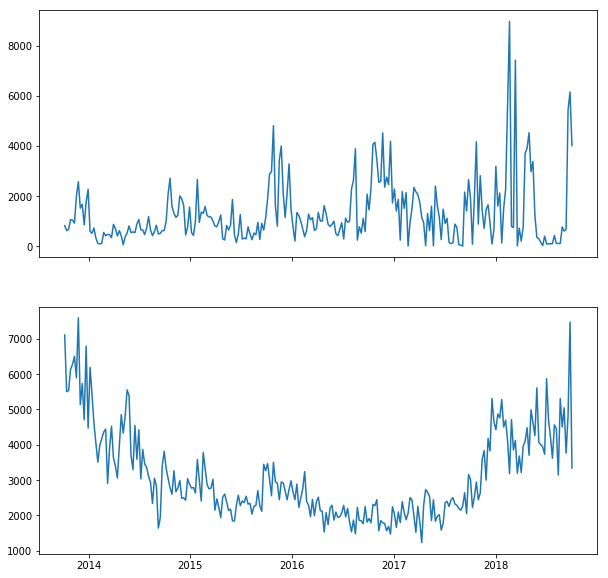

In [285]:
#Set up graph for larger view
dimensions = (10,10)

fig, (ax1, ax2)= pyplot.subplots(2, figsize=dimensions, sharex='all')
#Plot 2 subplots: Total and Value for weekly data
ax1.plot(mergedweeklydata.index, mergedweeklydata['TOTAL'])
ax2.plot(mergedweeklydata.index, mergedweeklydata['value'])

Correlations in Weekly Data

In [286]:
#Correlation between Total and Value of weekly data
mergedweeklydata['TOTAL'].corr(mergedweeklydata['value'])

#Correlation = 0.014855437018776894

0.014855437018776894

In [289]:
#Create one period (day) difference columns for Total and Value columns
#These new columns will ensure the data is stationary
mergedweeklydata['TOTALdiff'] = mergedweeklydata['TOTAL'].diff(1)
mergedweeklydata['valuediff'] = mergedweeklydata['value'].diff(1)

mergedweeklydata.head()

,CABLE TV,MAGAZINES,NAT SPOT RADIO,NATL NEWSP,NETWORK RADIO,NETWORK TV,NEWSPAPER,OUTDOOR,SPOT TV,SUNDAY MAGS,SYNDICATION,TOTAL,Unnamed: 0,value,onedifvalue,TOTALdiff,valuediff
FIXED TIME,,,,,,,,,,,,,,,,,
2013-10-07,363.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.5,0.0,379.9,815.2,3,7106.318305,-279.902227,NaN,NaN
2013-10-14,325.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.2,0.0,250.5,619.8,10,5504.757506,297.620141,-195.4,-1601.560799
2013-10-21,369.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.5,0.0,253.9,668.3,17,5532.372752,-311.716903,48.5,27.615247
2013-10-28,400.6,0.0,0.0,0.0,1.7,0.0,0.0,462.5,45.9,0.0,143.3,1054.0,24,6133.050943,369.302342,385.7,600.678190
2013-11-04,402.3,0.0,0.0,0.0,4.0,430.8,0.0,0.0,48.3,0.0,152.6,1038.0,31,6275.769677,-333.158293,-16.0,142.718735


In [291]:
#Correlation between one period difference columns for Total and Value of weekly data
mergedweeklydata['TOTALdiff'].corr(mergedweeklydata['valuediff'])

#Correlation = 0.02311790642545799

0.02311790642545799

In [292]:
#Download ad spend weekly data to CSV
mergedweeklydata.to_csv('adspend.googletrends.weekly.csv')

### Part 6: Assess Whether Advertising Expenditures "Granger Cause" or Predict Search Interest Data

In [293]:
#Import adspend weekly CSV
adspend_trends = pd.read_csv('adspend.googletrends.weekly.csv', parse_dates=['FIXED TIME'])

In [294]:
#Set index with "fixed time" column
adspend_trends.set_index('FIXED TIME', inplace=True)

In [295]:
#View list of columns of adspend
list(adspend_trends)

['CABLE TV',
 'MAGAZINES',
 'NAT SPOT RADIO',
 'NATL NEWSP',
 'NETWORK RADIO',
 'NETWORK TV',
 'NEWSPAPER',
 'OUTDOOR',
 'SPOT TV',
 'SUNDAY MAGS',
 'SYNDICATION',
 'TOTAL',
 'Unnamed: 0',
 'value',
 'onedifvalue',
 'TOTALdiff',
 'valuediff']

In [296]:
#Remove unnecessary columns from dataframe
adspend_trends = adspend_trends.drop(columns=['onedifvalue', 'Unnamed: 0', 'TOTALdiff', 'valuediff', 'SUNDAY MAGS'])

In [297]:
#View list of columns of adspend with removed columns
list(adspend_trends)

['CABLE TV',
 'MAGAZINES',
 'NAT SPOT RADIO',
 'NATL NEWSP',
 'NETWORK RADIO',
 'NETWORK TV',
 'NEWSPAPER',
 'OUTDOOR',
 'SPOT TV',
 'SYNDICATION',
 'TOTAL',
 'value']

In [298]:
#Use adf test function to calculate the stationarity of variable columns
from statsmodels.tsa import stattools
from statistics import mode
#For loop to iterate through columns of dataframe and print adf test output value
for acolumn in list(adspend_trends):
    adf_result = stattools.adfuller(adspend_trends[acolumn])
    print(adf_result[1])

3.175601733552277e-11
3.75627719227519e-09
0.5067120241466552
5.223049731643651e-29
0.01912723131353339
2.423592953885211e-05
5.223049731644098e-29
0.005846411825341255
0.0008532072242751308
0.0016787178895916553
4.9366536860972805e-06
0.10845709610049953


In [299]:
#Create new dataframe for difference in adspend trends
adspend_trends_diff = pd.DataFrame()

In [300]:
#For loop to iterate through dataframe to create new difference column
#%s = placeholder replaced with each column name
for acolumn in list(adspend_trends):
    columnname = "%s_diff" % (acolumn)
    adspend_trends_diff[columnname] = adspend_trends[acolumn].diff(1)

adspend_trends_diff.head()

,CABLE TV_diff,MAGAZINES_diff,NAT SPOT RADIO_diff,NATL NEWSP_diff,NETWORK RADIO_diff,NETWORK TV_diff,NEWSPAPER_diff,OUTDOOR_diff,SPOT TV_diff,SYNDICATION_diff,TOTAL_diff,value_diff
FIXED TIME,,,,,,,,,,,,
2013-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-14,-38.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-27.3,-129.4,-195.4,-1601.560799
2013-10-21,44.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,3.4,48.5,27.615247
2013-10-28,30.8,0.0,0.0,0.0,1.7,0.0,0.0,462.5,1.4,-110.6,385.7,600.678190
2013-11-04,1.7,0.0,0.0,0.0,2.3,430.8,0.0,-462.5,2.4,9.3,-16.0,142.718735


In [301]:
#Use adf test function to calculate the stationarity of variable columns
#For loop to iterate through through columns of differenced dataframe and print adf test output value
for acolumn in list(adspend_trends_diff):
    adf_result = stattools.adfuller(adspend_trends_diff[acolumn].iloc[1:])
    print(adf_result[1])

3.252836214983963e-10
8.677904106894232e-15
2.7734131669326794e-11
1.673806383490319e-13
4.1585781953608326e-10
2.326009665303393e-25
1.6738063834904163e-13
6.672214264934636e-10
5.080732761044655e-27
9.881939573859992e-25
1.1041305609169547e-06
2.126027415421676e-14


In [302]:
#Create variable for correlation list
#For loop to iterate through differenced adspend dataframe to print correlation values
correlationlist = []
for acolumn in list(adspend_trends_diff):
    if "value" not in acolumn:
        corr = adspend_trends_diff[acolumn].corr(adspend_trends_diff['value_diff'])
        print(acolumn, corr)
        correlationlist.append(corr)

CABLE TV_diff 0.03595345144091727
MAGAZINES_diff -0.0033130316457407895
NAT SPOT RADIO_diff 0.06675726133649122
NATL NEWSP_diff -0.0053517593667680155
NETWORK RADIO_diff 0.008235146850391327
NETWORK TV_diff 0.043892037312691534
NEWSPAPER_diff -0.038567251166430006
OUTDOOR_diff -0.0611312290311334
SPOT TV_diff 0.07710591825232276
SYNDICATION_diff -0.1267984712427169
TOTAL_diff 0.023117906425457965


In [303]:
#Calculate mean of correlation list
mean = np.mean(correlationlist)
mean

#mean = 0.0018090890150439063

0.0018090890150439063

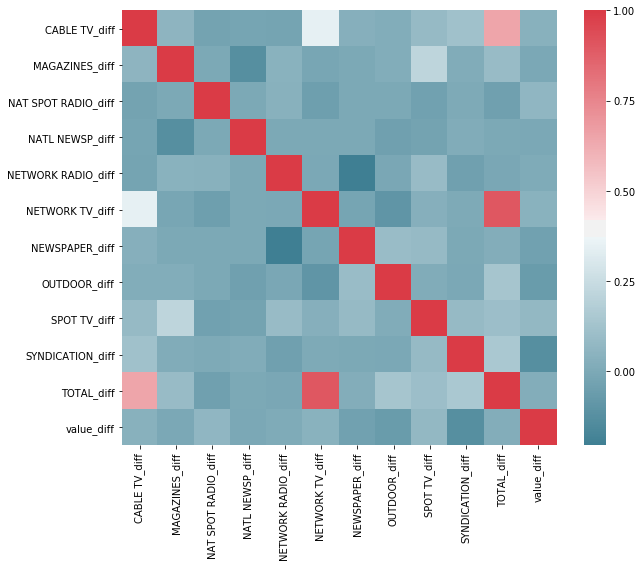

In [304]:
#Set up graph for larger view
f, ax = pyplot.subplots(figsize=(10,8))
#Plot correlation heatmap using seaborn package
corr = adspend_trends_diff.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax )

In [357]:
#Calculate Hulu's AdSpend sum for Cable TV
adspendnoproducts['CABLE TV'].sum()

120038.5

In [358]:
#Calculate Hulu's AdSpend sum for Network TV
adspendnoproducts['NETWORK TV'].sum()

170910.6

Determining Granger Causality

In [305]:
#Run granger causality test to determine lags
#numofweeks = 8 (2 months)
numofweeks = 8
#list of most common/significant lags
significantlags = []
#for loop to iterate through differenced data
for acolumn in list(adspend_trends_diff):
    if 'value' not in acolumn:
        testframe = adspend_trends_diff[['value_diff', acolumn]]
        testframe = testframe.iloc[1:]
        results = stattools.grangercausalitytests(testframe, numofweeks, verbose=False)
        for week in range(1,numofweeks+1):
            if results[week][0]['params_ftest'][1] <.05:
                print('%s is significant at %s weeks' % (acolumn, week))
                significantlags.append(week)
#Output prints significant lags and location

NAT SPOT RADIO_diff is significant at 7 weeks
NAT SPOT RADIO_diff is significant at 8 weeks
OUTDOOR_diff is significant at 3 weeks
OUTDOOR_diff is significant at 4 weeks
SPOT TV_diff is significant at 2 weeks
SPOT TV_diff is significant at 3 weeks
SPOT TV_diff is significant at 4 weeks
SPOT TV_diff is significant at 5 weeks
SPOT TV_diff is significant at 7 weeks


In [306]:
#Create new variable for modeling data
modelingdataset = adspend_trends_diff

modelingdataset.tail()

,CABLE TV_diff,MAGAZINES_diff,NAT SPOT RADIO_diff,NATL NEWSP_diff,NETWORK RADIO_diff,NETWORK TV_diff,NEWSPAPER_diff,OUTDOOR_diff,SPOT TV_diff,SYNDICATION_diff,TOTAL_diff,value_diff
FIXED TIME,,,,,,,,,,,,
2018-09-03,0.0,0.0,-40.0,0.0,0.0,508.1,0.0,-676.0,42.7,0.0,-165.1,542.626875
2018-09-10,23.0,0.0,0.0,0.0,0.0,75.9,0.0,0.0,-33.9,0.0,65.0,-1285.732804
2018-09-17,587.4,0.0,0.0,0.0,0.0,4170.4,0.0,0.0,17.8,0.0,4775.6,1059.457829
2018-09-24,104.3,0.0,0.0,0.0,0.0,565.7,0.0,0.0,47.1,0.0,717.0,2655.251636
2018-10-01,78.8,0.0,-11.9,0.0,0.0,-2826.2,0.0,636.9,-19.2,0.0,-2141.7,-4135.399471


In [307]:
#Adding 8 weeks of lag
date = pd.to_datetime('2018-10-08')
modelingdataset.loc[date] = np.nan

date = pd.to_datetime('2018-10-15')
modelingdataset.loc[date] = np.nan

date = pd.to_datetime('2018-10-22')
modelingdataset.loc[date] = np.nan

date = pd.to_datetime('2018-10-29')
modelingdataset.loc[date] = np.nan

date = pd.to_datetime('2018-11-05')
modelingdataset.loc[date] = np.nan

date = pd.to_datetime('2018-11-12')
modelingdataset.loc[date] = np.nan

date = pd.to_datetime('2018-11-19')
modelingdataset.loc[date] = np.nan

date = pd.to_datetime('2018-11-26')
modelingdataset.loc[date] = np.nan

In [308]:
#For loop to add lag columns
for column in list(modelingdataset):
    if 'value' not in column:
        for lag in range(1,9):
            columnname = '%s_lag%s' % (column, lag)
            modelingdataset[columnname] = modelingdataset[column].shift(lag)

In [309]:
#Sort dataframe by index and position
modelingdataset.sort_index(axis=1, inplace=True)
modelingdataset.head(15)

,CABLE TV_diff,CABLE TV_diff_lag1,CABLE TV_diff_lag2,CABLE TV_diff_lag3,CABLE TV_diff_lag4,CABLE TV_diff_lag5,CABLE TV_diff_lag6,CABLE TV_diff_lag7,CABLE TV_diff_lag8,MAGAZINES_diff,...,TOTAL_diff,TOTAL_diff_lag1,TOTAL_diff_lag2,TOTAL_diff_lag3,TOTAL_diff_lag4,TOTAL_diff_lag5,TOTAL_diff_lag6,TOTAL_diff_lag7,TOTAL_diff_lag8,value_diff
FIXED TIME,,,,,,,,,,,,,,,,,,,,,
2013-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-14,-38.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,-195.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1601.560799
2013-10-21,44.7,-38.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,48.5,-195.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.615247
2013-10-28,30.8,44.7,-38.7,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,385.7,48.5,-195.4,NaN,NaN,NaN,NaN,NaN,NaN,600.678190
2013-11-04,1.7,30.8,44.7,-38.7,NaN,NaN,NaN,NaN,NaN,0.0,...,-16.0,385.7,48.5,-195.4,NaN,NaN,NaN,NaN,NaN,142.718735
2013-11-11,155.7,1.7,30.8,44.7,-38.7,NaN,NaN,NaN,NaN,0.0,...,-122.7,-16.0,385.7,48.5,-195.4,NaN,NaN,NaN,NaN,229.787503
2013-11-18,106.1,155.7,1.7,30.8,44.7,-38.7,NaN,NaN,NaN,0.0,...,1073.9,-122.7,-16.0,385.7,48.5,-195.4,NaN,NaN,NaN,-609.065631
2013-11-25,62.4,106.1,155.7,1.7,30.8,44.7,-38.7,NaN,NaN,0.0,...,579.6,1073.9,-122.7,-16.0,385.7,48.5,-195.4,NaN,NaN,1694.454530
2013-12-02,-62.2,62.4,106.1,155.7,1.7,30.8,44.7,-38.7,NaN,0.0,...,-1054.6,579.6,1073.9,-122.7,-16.0,385.7,48.5,-195.4,NaN,-2456.049152


In [310]:
#Download differenced lagged data to CSV
modelingdataset.to_csv('google_adspend_differenced_lagged_fordatarobot.csv')

##### Assessing Whether Advertising Expenditures Predict Granger Cause

Prior to using Granger Cause analysis, Hulu's AdSpend data showed that Hulu spends the most on Cable TV and Network TV advertising at 120038.5 and 170910.6 respectively. After running the Granger Cause analysis test, the output illustrated significance in different variables. The test output indicated 9 significant lags, ranging from week 3-8, relating to variables NAT SPOT RADIO_diff, OUTDOOR_diff, and SPOT TV_diff. The Granger Cause test predicts values based on past values. The test utilizes the lagged data set, where each lag is measured by the series of changes from one period to the next. Because these variables were deterimined significant, there must be a measurable change between the lags.

Using LASSO Regression for Predictive Analysis

In [311]:
#Import differenced/lagged data from CSV
alldata = pd.read_csv("google_adspend_differenced_lagged_fordatarobot.csv")

In [312]:
#Set index parameters as "fixed time"
alldata.set_index(alldata['FIXED TIME'], inplace=True)

In [313]:
#View list of columns from alldata
list(alldata)

['FIXED TIME',
 'CABLE TV_diff',
 'CABLE TV_diff_lag1',
 'CABLE TV_diff_lag2',
 'CABLE TV_diff_lag3',
 'CABLE TV_diff_lag4',
 'CABLE TV_diff_lag5',
 'CABLE TV_diff_lag6',
 'CABLE TV_diff_lag7',
 'CABLE TV_diff_lag8',
 'MAGAZINES_diff',
 'MAGAZINES_diff_lag1',
 'MAGAZINES_diff_lag2',
 'MAGAZINES_diff_lag3',
 'MAGAZINES_diff_lag4',
 'MAGAZINES_diff_lag5',
 'MAGAZINES_diff_lag6',
 'MAGAZINES_diff_lag7',
 'MAGAZINES_diff_lag8',
 'NAT SPOT RADIO_diff',
 'NAT SPOT RADIO_diff_lag1',
 'NAT SPOT RADIO_diff_lag2',
 'NAT SPOT RADIO_diff_lag3',
 'NAT SPOT RADIO_diff_lag4',
 'NAT SPOT RADIO_diff_lag5',
 'NAT SPOT RADIO_diff_lag6',
 'NAT SPOT RADIO_diff_lag7',
 'NAT SPOT RADIO_diff_lag8',
 'NATL NEWSP_diff',
 'NATL NEWSP_diff_lag1',
 'NATL NEWSP_diff_lag2',
 'NATL NEWSP_diff_lag3',
 'NATL NEWSP_diff_lag4',
 'NATL NEWSP_diff_lag5',
 'NATL NEWSP_diff_lag6',
 'NATL NEWSP_diff_lag7',
 'NATL NEWSP_diff_lag8',
 'NETWORK RADIO_diff',
 'NETWORK RADIO_diff_lag1',
 'NETWORK RADIO_diff_lag2',
 'NETWORK RADIO_d

Removing NAN Values to run LASSO Regression

In [314]:
#Remove "fixed time" column from dataframe
alldata = alldata.drop(columns=['FIXED TIME'])

#View first 15 rows of dataframe to look for any NAN values
alldata.head(15)

,CABLE TV_diff,CABLE TV_diff_lag1,CABLE TV_diff_lag2,CABLE TV_diff_lag3,CABLE TV_diff_lag4,CABLE TV_diff_lag5,CABLE TV_diff_lag6,CABLE TV_diff_lag7,CABLE TV_diff_lag8,MAGAZINES_diff,...,TOTAL_diff,TOTAL_diff_lag1,TOTAL_diff_lag2,TOTAL_diff_lag3,TOTAL_diff_lag4,TOTAL_diff_lag5,TOTAL_diff_lag6,TOTAL_diff_lag7,TOTAL_diff_lag8,value_diff
FIXED TIME,,,,,,,,,,,,,,,,,,,,,
2013-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-14,-38.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,-195.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1601.560799
2013-10-21,44.7,-38.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,48.5,-195.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.615247
2013-10-28,30.8,44.7,-38.7,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,385.7,48.5,-195.4,NaN,NaN,NaN,NaN,NaN,NaN,600.678190
2013-11-04,1.7,30.8,44.7,-38.7,NaN,NaN,NaN,NaN,NaN,0.0,...,-16.0,385.7,48.5,-195.4,NaN,NaN,NaN,NaN,NaN,142.718735
2013-11-11,155.7,1.7,30.8,44.7,-38.7,NaN,NaN,NaN,NaN,0.0,...,-122.7,-16.0,385.7,48.5,-195.4,NaN,NaN,NaN,NaN,229.787503
2013-11-18,106.1,155.7,1.7,30.8,44.7,-38.7,NaN,NaN,NaN,0.0,...,1073.9,-122.7,-16.0,385.7,48.5,-195.4,NaN,NaN,NaN,-609.065631
2013-11-25,62.4,106.1,155.7,1.7,30.8,44.7,-38.7,NaN,NaN,0.0,...,579.6,1073.9,-122.7,-16.0,385.7,48.5,-195.4,NaN,NaN,1694.454530
2013-12-02,-62.2,62.4,106.1,155.7,1.7,30.8,44.7,-38.7,NaN,0.0,...,-1054.6,579.6,1073.9,-122.7,-16.0,385.7,48.5,-195.4,NaN,-2456.049152


In [315]:
#Delete first 9 rows to remove NAN values
alldata = alldata.iloc[9:]

alldata.head()

,CABLE TV_diff,CABLE TV_diff_lag1,CABLE TV_diff_lag2,CABLE TV_diff_lag3,CABLE TV_diff_lag4,CABLE TV_diff_lag5,CABLE TV_diff_lag6,CABLE TV_diff_lag7,CABLE TV_diff_lag8,MAGAZINES_diff,...,TOTAL_diff,TOTAL_diff_lag1,TOTAL_diff_lag2,TOTAL_diff_lag3,TOTAL_diff_lag4,TOTAL_diff_lag5,TOTAL_diff_lag6,TOTAL_diff_lag7,TOTAL_diff_lag8,value_diff
FIXED TIME,,,,,,,,,,,,,,,,,,,,,
2013-12-09,-343.0,-62.2,62.4,106.1,155.7,1.7,30.8,44.7,-38.7,0.0,...,158.2,-1054.6,579.6,1073.9,-122.7,-16.0,385.7,48.5,-195.4,596.901842
2013-12-16,4.4,-343.0,-62.2,62.4,106.1,155.7,1.7,30.8,44.7,0.0,...,-824.9,158.2,-1054.6,579.6,1073.9,-122.7,-16.0,385.7,48.5,-1025.948606
2013-12-23,620.6,4.4,-343.0,-62.2,62.4,106.1,155.7,1.7,30.8,0.0,...,917.1,-824.9,158.2,-1054.6,579.6,1073.9,-122.7,-16.0,385.7,2089.646593
2013-12-30,103.5,620.6,4.4,-343.0,-62.2,62.4,106.1,155.7,1.7,0.0,...,505.4,917.1,-824.9,158.2,-1054.6,579.6,1073.9,-122.7,-16.0,-2323.893155
2014-01-06,-606.0,103.5,620.6,4.4,-343.0,-62.2,62.4,106.1,155.7,0.0,...,-1678.7,505.4,917.1,-824.9,158.2,-1054.6,579.6,1073.9,-122.7,1717.594560


In [316]:
#View tail of dataframe to check for NAN values
alldata.tail(15)

,CABLE TV_diff,CABLE TV_diff_lag1,CABLE TV_diff_lag2,CABLE TV_diff_lag3,CABLE TV_diff_lag4,CABLE TV_diff_lag5,CABLE TV_diff_lag6,CABLE TV_diff_lag7,CABLE TV_diff_lag8,MAGAZINES_diff,...,TOTAL_diff,TOTAL_diff_lag1,TOTAL_diff_lag2,TOTAL_diff_lag3,TOTAL_diff_lag4,TOTAL_diff_lag5,TOTAL_diff_lag6,TOTAL_diff_lag7,TOTAL_diff_lag8,value_diff
FIXED TIME,,,,,,,,,,,,,,,,,,,,,
2018-08-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.0,0.0,...,0.0,0.0,-319.9,328.3,1.5,5.0,0.0,-309.8,382.8,2163.899921
2018-08-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,660.1,0.0,0.0,-319.9,328.3,1.5,5.0,0.0,-309.8,-803.102166
2018-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-165.1,660.1,0.0,0.0,-319.9,328.3,1.5,5.0,0.0,542.626875
2018-09-10,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65.0,-165.1,660.1,0.0,0.0,-319.9,328.3,1.5,5.0,-1285.732804
2018-09-17,587.4,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4775.6,65.0,-165.1,660.1,0.0,0.0,-319.9,328.3,1.5,1059.457829
2018-09-24,104.3,587.4,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,717.0,4775.6,65.0,-165.1,660.1,0.0,0.0,-319.9,328.3,2655.251636
2018-10-01,78.8,104.3,587.4,23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2141.7,717.0,4775.6,65.0,-165.1,660.1,0.0,0.0,-319.9,-4135.399471
2018-10-08,NaN,78.8,104.3,587.4,23.0,0.0,0.0,0.0,0.0,NaN,...,NaN,-2141.7,717.0,4775.6,65.0,-165.1,660.1,0.0,0.0,NaN
2018-10-15,NaN,NaN,78.8,104.3,587.4,23.0,0.0,0.0,0.0,NaN,...,NaN,NaN,-2141.7,717.0,4775.6,65.0,-165.1,660.1,0.0,NaN


In [317]:
#Delete last 8 rows from dataframe to remove NAN values
alldata = alldata.iloc[:-8]

alldata.tail()

,CABLE TV_diff,CABLE TV_diff_lag1,CABLE TV_diff_lag2,CABLE TV_diff_lag3,CABLE TV_diff_lag4,CABLE TV_diff_lag5,CABLE TV_diff_lag6,CABLE TV_diff_lag7,CABLE TV_diff_lag8,MAGAZINES_diff,...,TOTAL_diff,TOTAL_diff_lag1,TOTAL_diff_lag2,TOTAL_diff_lag3,TOTAL_diff_lag4,TOTAL_diff_lag5,TOTAL_diff_lag6,TOTAL_diff_lag7,TOTAL_diff_lag8,value_diff
FIXED TIME,,,,,,,,,,,,,,,,,,,,,
2018-09-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-165.1,660.1,0.0,0.0,-319.9,328.3,1.5,5.0,0.0,542.626875
2018-09-10,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,65.0,-165.1,660.1,0.0,0.0,-319.9,328.3,1.5,5.0,-1285.732804
2018-09-17,587.4,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4775.6,65.0,-165.1,660.1,0.0,0.0,-319.9,328.3,1.5,1059.457829
2018-09-24,104.3,587.4,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,717.0,4775.6,65.0,-165.1,660.1,0.0,0.0,-319.9,328.3,2655.251636
2018-10-01,78.8,104.3,587.4,23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2141.7,717.0,4775.6,65.0,-165.1,660.1,0.0,0.0,-319.9,-4135.399471


Initate Predictor Variables for LASSO Regression

In [318]:
#Initiate variable for list of predictors
listofallpredictors = []

In [319]:
#For loop to iterate through data to extract predictor variables into list
for avar in list(alldata):
    if "value" not in avar:
        listofallpredictors.append(avar)

In [320]:
#View list of all predictor columns
print(listofallpredictors)

['CABLE TV_diff', 'CABLE TV_diff_lag1', 'CABLE TV_diff_lag2', 'CABLE TV_diff_lag3', 'CABLE TV_diff_lag4', 'CABLE TV_diff_lag5', 'CABLE TV_diff_lag6', 'CABLE TV_diff_lag7', 'CABLE TV_diff_lag8', 'MAGAZINES_diff', 'MAGAZINES_diff_lag1', 'MAGAZINES_diff_lag2', 'MAGAZINES_diff_lag3', 'MAGAZINES_diff_lag4', 'MAGAZINES_diff_lag5', 'MAGAZINES_diff_lag6', 'MAGAZINES_diff_lag7', 'MAGAZINES_diff_lag8', 'NAT SPOT RADIO_diff', 'NAT SPOT RADIO_diff_lag1', 'NAT SPOT RADIO_diff_lag2', 'NAT SPOT RADIO_diff_lag3', 'NAT SPOT RADIO_diff_lag4', 'NAT SPOT RADIO_diff_lag5', 'NAT SPOT RADIO_diff_lag6', 'NAT SPOT RADIO_diff_lag7', 'NAT SPOT RADIO_diff_lag8', 'NATL NEWSP_diff', 'NATL NEWSP_diff_lag1', 'NATL NEWSP_diff_lag2', 'NATL NEWSP_diff_lag3', 'NATL NEWSP_diff_lag4', 'NATL NEWSP_diff_lag5', 'NATL NEWSP_diff_lag6', 'NATL NEWSP_diff_lag7', 'NATL NEWSP_diff_lag8', 'NETWORK RADIO_diff', 'NETWORK RADIO_diff_lag1', 'NETWORK RADIO_diff_lag2', 'NETWORK RADIO_diff_lag3', 'NETWORK RADIO_diff_lag4', 'NETWORK RADIO_d

In [321]:
#Set the list of all predictors to a variable for "predictors"
predictors = alldata[listofallpredictors]

In [322]:
#Set target variable as "value_diff" 
target = alldata['value_diff']

In [323]:
#Split data into training and test sets
from sklearn.model_selection import train_test_split

pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, test_size = 0.3, random_state=123)

Initiate LASSO Regression Model

In [324]:
#Model = LassoLarsCV
from sklearn.linear_model import LassoLarsCV
import warnings
warnings.filterwarnings('ignore')

model = LassoLarsCV(cv=10, precompute=False)

In [325]:
#Use fit function to fit training set to model
model = model.fit(pred_train.values, tar_train.values)

In [326]:
#Specify model output
predictors_model = pd.DataFrame(listofallpredictors)
predictors_model.columns = ['label']
predictors_model['coeff'] = model.coef_

In [327]:
#For loop to iterate through dataframe to print any coefficient with significance (value greater than zero)
for index, row in predictors_model.iterrows():
    if row['coeff'] > 0:
        print(row.values)

['OUTDOOR_diff_lag8' 0.12531889324775522]


In [328]:
#Calculate error on training set
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(tar_train, model.predict(pred_train))
print('training data MSE')
print(train_error)

#training data MSE = 577819.2802654792

training data MSE
577819.2802654792


In [330]:
#Calculate error on test set
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print('testing data MSE')
print(test_error)

#testing data MSE = 335248.96428557375

testing data MSE
335248.96428557375


In [331]:
#Calculate R squared on training set
rsquared_train=model.score(pred_train,tar_train)
print ('training data R-square')
print(rsquared_train)

#training data R-square = 0.022059186969699555

training data R-square
0.022059186969699555


In [332]:
#Calculate R squared on test set
rsquared_test=model.score(pred_test,tar_test)
print ('testing data R-square')
print(rsquared_test)

#testing data R-square = -0.01606312568492685

testing data R-square
-0.01606312568492685


##### Effectiveness of LASSO Regression Model on Prediction

After experimentation, I found that the LASSO Regression model improved once I removed irrelevant products from the AdSpend data for Hulu. The R Squared values for both the training and test sets increased when removing irrelevant products while the Mean Squared Error values decreased for both the training and test sets. Ultimately, my best R squared value is the training data R-square value of 0.022

### Conclusion:

In conclusion, Hulu's search interest was at its lowest at the start of 2017 and illustrates an upwards trendline in the following years of 2018 and 2019. Using Facebook Prophet, the forecast model predicted an upwards trend for the remainder of 2019 into 2020. By extracting holidays and outlier events from the data, I was able to gain a greater understanding of the influence of outliers on time series analysis, particularly with forecasting. Holidays irrelevant to Hulu are those that are not observed by all businesses like Columbus Day. Holidays such as Christmas and Thanksgiving and the days that follow exemplify an influx in search interest when users are more likely to be streaming at home. Similarly, I concluded that outlier events were caused by both positive and negative news coverage for Hulu. New product launches and exclusive TV shows keep the Hulu brand relevant and top of mind for the consumer. With a competitor like Netflix, Hulu should capitlize on its product features like live TV and original TV shows like "Handmaid's Tale" in order to differentiate itself from its competition. While technical issues are recommended to be prevented, Hulu's instances of repeated outages have created a widespread buzz online in articles and particularly on Twitter. Overall, the AdSpend data was not the best predictor for Granger Cause. However, the AdSpend data improved the LASSO Regression model after I removed the irrelevant Hulu product types. The LASSO Regression R squared is only valued at 0.0220, allowing me to conclude that the AdSpend data is not the best predictor in this instance as well. The most successful model I had for the Hulu Google Trends data was when using Facebook Prophet. I was able to reduce the mean error by 82 units and the overall standard deviation by a considerable amount. The original model had an error of 868 Google Trend Units per day while the improved model reduced its error to 786 Google Trend Units per day. The forecast model was at its best when it excluded both holidays and outlier events. 